In [ ]:
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import pyperclip

import re
import time
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import seaborn as sns

import koreanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

font_path = '/Users/jieunlee/Documents/3_TECH!T_202305/TECH!T_dataton/nanum-barun-gothic/NanumBarunGothic.ttf'  # 각자 경로에 맞게
fontprop = fm.FontProperties(fname=font_path, size=18)

# **EDA & Visualization**

In [ ]:
data = pd.read_csv('최종데이터셋.csv')

In [ ]:
df_copy = data.copy()

### **데이터 타입 변환 및 추가 전처리**
- 좋아요수 / 조회수 / 구독수 / 회차 / 회차(한국) / 관심수(한국) -> int
- 별점 / 별점(한국) -> float
- 연재시작일 / 마지막연재일 -> 날짜형식통일 -> datetime
- 완결여부 / OSMU여부 / 태국진출여부 -> bool

In [ ]:
df_copy['좋아요수'] = df_copy['좋아요수'].astype('int')
df_copy['조회수'] = df_copy['조회수'].astype('int')
df_copy['구독수'] = df_copy['구독수'].astype('int')
df_copy['관심수(한국)'] = df_copy['관심수(한국)'].fillna(-1).astype('int').replace({-1: 0})
df_copy['회차(한국)'] = df_copy['회차(한국)'].fillna(-1).astype('int').replace({-1: 0})
df_copy['작가전작개수'] = df_copy['작가전작개수'].fillna(-1).astype('int').replace({-1: 0})

In [ ]:
df_copy['연재시작일(한국)'].fillna('.', inplace=True)

for i, date in enumerate(df_copy['연재시작일(한국)']):
    if date == '.':
        date = date
    elif date.endswith('.'):
        date = date[:-1]
    df_copy.loc[i, '연재시작일(한국)'] = date

In [ ]:
df_copy['연재시작일(한국)'] = df_copy['연재시작일(한국)'].str.split('.')

for i, date in enumerate(df_copy['연재시작일(한국)']):
    if date == '.':
        date = '.'
    elif len(date[0]) == 2:
        date[0] = '20' + date[0]
        date = '.'.join(date)
    else:
        date = '.'.join(date)
    df_copy.loc[i, '연재시작일(한국)'] = date

df_copy.loc[df_copy['연재시작일(한국)'] == '.', '연재시작일(한국)'] = np.NaN

df_copy['연재시작일(한국)'] = pd.to_datetime(df_copy['연재시작일(한국)'], format='%Y-%m-%d')

In [ ]:
df_copy['마지막연재일(한국)'].fillna('.', inplace=True)

for i, date in enumerate(df_copy['마지막연재일(한국)']):
    if date == '.':
        date = date
    elif date.endswith('.'):
        date = date[:-1]
    df_copy.loc[i, '마지막연재일(한국)'] = date

In [ ]:
df_copy['마지막연재일(한국)'] = df_copy['마지막연재일(한국)'].str.split('.')

for i, date in enumerate(df_copy['마지막연재일(한국)']):
    if date == '.':
        date = '.'
    elif len(date[0]) == 2:
        date[0] = '20' + date[0]
        date = '.'.join(date)
    else:
        date = '.'.join(date)
    df_copy.loc[i, '마지막연재일(한국)'] = date

df_copy.loc[df_copy['마지막연재일(한국)'] == '.', '마지막연재일(한국)'] = np.NaN

df_copy['마지막연재일(한국)'] = pd.to_datetime(df_copy['마지막연재일(한국)'], format='%Y-%m-%d')

In [ ]:
df_copy['연재시작일(태국)'] = df_copy['연재시작일(태국)'].str.replace('ม.ค', '.1.').str.replace('ก.พ.', '.2.').str.replace('มี.ค.', '.3.').str.replace('เม.ย.', '.4.').str.replace('พ.ค.', '.5.').str.replace('มิ.ย.', '.6.').str.replace('ก.ค.', '.7.').str.replace('ส.ค.', '.8.').str.replace('ก.ย.', '.9.').str.replace('ต.ค.', '.10.').str.replace('พ.ย.', '.11.').str.replace('ธ.ค.', '.12.').str.replace(' ', '').str.replace('..', '.')
df_copy['마지막연재일(태국)'] = df_copy['마지막연재일(태국)'].str.replace('ม.ค', '.1.').str.replace('ก.พ.', '.2.').str.replace('มี.ค.', '.3.').str.replace('เม.ย.', '.4.').str.replace('พ.ค.', '.5.').str.replace('มิ.ย.', '.6.').str.replace('ก.ค.', '.7.').str.replace('ส.ค.', '.8.').str.replace('ก.ย.', '.9.').str.replace('ต.ค.', '.10.').str.replace('พ.ย.', '.11.').str.replace('ธ.ค.', '.12.').str.replace(' ', '').str.replace('..', '.')

In [ ]:
df_copy['연재시작일(태국)'] = pd.to_datetime(df_copy['연재시작일(태국)'], format='%d.%m.%Y')
df_copy['연재시작일(태국)'] = df_copy['연재시작일(태국)'].dt.strftime('%Y.%m.%d')
df_copy['마지막연재일(태국)'] = pd.to_datetime(df_copy['마지막연재일(태국)'], format='%d.%m.%Y')
df_copy['마지막연재일(태국)'] = df_copy['마지막연재일(태국)'].dt.strftime('%Y.%m.%d')

In [ ]:
df_copy['연재시작일(태국)'].fillna('.', inplace=True)

for i, date in enumerate(df_copy['연재시작일(태국)']):
    if date == '.':
        date = date
    elif date.endswith('.'):
        date = date[:-1]
    df_copy.loc[i, '연재시작일(태국)'] = date

In [ ]:
df_copy['연재시작일(태국)'] = df_copy['연재시작일(태국)'].str.split('.')

for i, date in enumerate(df_copy['연재시작일(태국)']):
    if date == '.':
        date = '.'
    elif len(date[0]) == 2:
        date[0] = '20' + date[0]
        date = '.'.join(date)
    else:
        date = '.'.join(date)
    df_copy.loc[i, '연재시작일(태국)'] = date

df_copy.loc[df_copy['연재시작일(태국)'] == '.', '연재시작일(태국)'] = np.NaN

df_copy['연재시작일(태국)'] = pd.to_datetime(df_copy['연재시작일(태국)'], format='%Y.%m.%d')

In [ ]:
df_copy['마지막연재일(태국)'].fillna('.', inplace=True)

for i, date in enumerate(df_copy['마지막연재일(태국)']):
    if date == '.':
        date = date
    elif date.endswith('.'):
        date = date[:-1]
    df_copy.loc[i, '마지막연재일(태국)'] = date

In [ ]:
df_copy['마지막연재일(태국)'] = df_copy['마지막연재일(태국)'].str.split('.')

for i, date in enumerate(df_copy['마지막연재일(태국)']):
    if date == '.':
        date = '.'
    elif len(date[0]) == 2:
        date[0] = '20' + date[0]
        date = '.'.join(date)
    else:
        date = '.'.join(date)
    df_copy.loc[i, '마지막연재일(태국)'] = date

df_copy.loc[df_copy['마지막연재일(태국)'] == '.', '마지막연재일(태국)'] = np.NaN

df_copy['마지막연재일(태국)'] = pd.to_datetime(df_copy['마지막연재일(태국)'], format='%Y.%m.%d')

In [ ]:
# 연재시작일이 마지막연재일보다 늦은 경우 변경

for i, (start, last) in enumerate(zip(df_copy['연재시작일(태국)'], df_copy['마지막연재일(태국)'])):
    if start > last:
        df_copy.loc[i, '연재시작일(태국)'] = last
        df_copy.loc[i, '마지막연재일(태국)'] = start

for i, (start, last) in enumerate(zip(df_copy['연재시작일(한국)'], df_copy['마지막연재일(한국)'])):
    if start > last:
        df_copy.loc[i, '연재시작일(한국)'] = last
        df_copy.loc[i, '마지막연재일(한국)'] = start

In [ ]:
df_copy['연재기간(태국)'] = (df_copy['마지막연재일(태국)'] - df_copy['연재시작일(태국)']).dt.days
df_copy['연재기간(한국)'] = (df_copy['마지막연재일(한국)'] - df_copy['연재시작일(한국)']).dt.days

In [ ]:
df_copy[['연재기간(태국)', '연재기간(한국)']].describe()

,연재기간(태국),연재기간(한국)
count,877.00000,593.00000
mean,233.89510,607.18212
std,377.77992,724.51652
min,0.00000,0.00000
25%,7.00000,163.00000
50%,42.00000,438.00000
75%,343.00000,791.00000
max,2884.00000,6198.00000


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   제목          877 non-null    object        
 1   작가          877 non-null    object        
 2   장르(태국)      877 non-null    object        
 3   좋아요수        877 non-null    int64         
 4   조회수         877 non-null    int64         
 5   구독수         877 non-null    int64         
 6   별점          877 non-null    float64       
 7   회차          877 non-null    int64         
 8   연재시작일(태국)   877 non-null    datetime64[ns]
 9   마지막연재일(태국)  877 non-null    datetime64[ns]
 10  국가          877 non-null    object        
 11  한국제목        593 non-null    object        
 12  한국작가명       593 non-null    object        
 13  회차(한국)      877 non-null    int64         
 14  별점(한국)      593 non-null    float64       
 15  관심수(한국)     877 non-null    int64         
 16  장르(한국)      593 non-null  

In [ ]:
df_copy.to_csv('최종데이터셋_230920.csv')

In [ ]:
df_copy.columns

Index(['제목', '작가', '장르(태국)', '좋아요수', '조회수', '구독수', '별점', '회차', '연재시작일(태국)',
       '마지막연재일(태국)', '국가', '한국제목', '한국작가명', '회차(한국)', '별점(한국)', '관심수(한국)',
       '장르(한국)', '해시태그(한국)', '연재시작일(한국)', '마지막연재일(한국)', '완결여부', '웹툰/시리즈구분',
       '작가전작개수', 'OSMU여부', '태국진출여부', '연재기간(태국)', '연재기간(한국)'],
      dtype='object')

## **Visualization**

### **1. 국가별 작품 비중**

In [ ]:
df_copy.columns

Index(['제목', '작가', '장르(태국)', '좋아요수', '조회수', '구독수', '별점', '회차', '연재시작일(태국)',
       '마지막연재일(태국)', '국가', '한국제목', '한국작가명', '회차(한국)', '별점(한국)', '관심수(한국)',
       '장르(한국)', '해시태그(한국)', '연재시작일(한국)', '마지막연재일(한국)', '완결여부', '웹툰/시리즈구분',
       '작가전작개수', 'OSMU여부', '태국진출여부'],
      dtype='object')

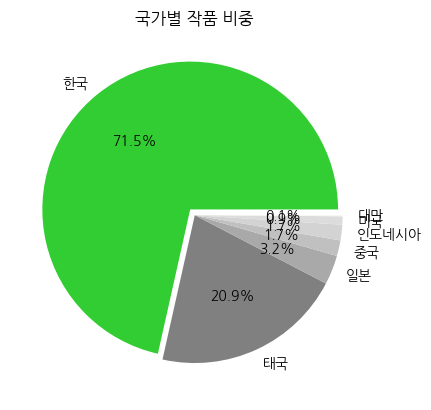

In [ ]:
state_df = pd.DataFrame(columns=['index', 'values'])

index = df_copy['국가'].value_counts().index
values = df_copy['국가'].value_counts().values

state_df['index'] = index
state_df['values'] = values

colors = ['limegreen', 'gray', 'darkgray', 'silver', 'lightgray', 'gainsboro', 'whitesmoke']
plt.pie(state_df['values'], labels=state_df['index'], autopct='%1.1f%%', colors=colors, explode=(0.05,0,0,0,0,0,0))

plt.title('국가별 작품 비중')

plt.rc('font', size=10) 

💡 
- 전체 라인웹툰태국에서 한국웹툰이 차지하는 비율은 71.5%
- 태국이 20.9%, 이후 일본, 중국, 인도네시아, 미국, 대만 순
- 예를 들어, "라인웹툰 플랫폼에서 한국 작품은 전체 작품 중 40%의 작품 분포 비율을 차지하고 있으며, 태국 작품은 30%의 작품 분포 비율을 갖고 있습니다"라고 말할 수 있습니다. 이것은 각 국가의 작품이 라인웹툰 플랫폼에서 차지하는 비율을 설명하는 방법입니다.

### **2. 연도별 태국 진출 한국 작품 비중 변화**

In [ ]:
# '연재연도' 칼럼 초기화
df_copy['연재기간(태국)_연도'] = None

# '연재시작연도'와 '마지막연재연도' 값을 기반으로 '연재연도' 칼럼에 리스트 할당
for index, row in df_copy.iterrows():
    start_year = row['연재시작일(태국)_연도']
    end_year = row['마지막연재일(태국)_연도']
    df_copy.at[index, '연재기간(태국)_연도'] = list(range(start_year, end_year + 1))

In [ ]:
kor = df_copy[(df_copy['한국제목'].notna())]
webtoon = df_copy[(df_copy['한국제목'].notna()) & (df_copy['웹툰/시리즈구분'] == '웹툰')]
series = df_copy[(df_copy['한국제목'].notna()) & (df_copy['웹툰/시리즈구분'] == '시리즈')]

In [ ]:
from collections import Counter

year_cnt = [year for years in df_copy['연재기간(태국)_연도'] for year in years]
year_cnt = pd.DataFrame(list(Counter(year_cnt).items()), columns=['연도', '빈도'])

kor_year_cnt = [year for years in kor['연재기간(태국)_연도'] for year in years]
kor_year_cnt = pd.DataFrame(list(Counter(kor_year_cnt).items()), columns=['연도', '빈도'])

webtoon_year_cnt = [year for years in webtoon['연재기간(태국)_연도'] for year in years]
webtoon_year_cnt = pd.DataFrame(list(Counter(webtoon_year_cnt).items()), columns=['연도', '빈도'])

series_year_cnt = [year for years in series['연재기간(태국)_연도'] for year in years]
series_year_cnt = pd.DataFrame(list(Counter(series_year_cnt).items()), columns=['연도', '빈도'])

In [ ]:
year_cnt = year_cnt.sort_values('연도')
year_cnt.reset_index(drop=True, inplace=True)
year_cnt

,연도,빈도
0,2014,3
1,2015,47
2,2016,60
3,2017,70
4,2018,56
5,2019,81
6,2020,117
7,2021,264
8,2022,335
9,2023,329


In [ ]:
kor_year_cnt = kor_year_cnt.sort_values('연도')
kor_year_cnt.reset_index(drop=True, inplace=True)
kor_year_cnt

,연도,빈도
0,2014,3
1,2015,28
2,2016,26
3,2017,38
4,2018,26
5,2019,56
6,2020,80
7,2021,186
8,2022,239
9,2023,248


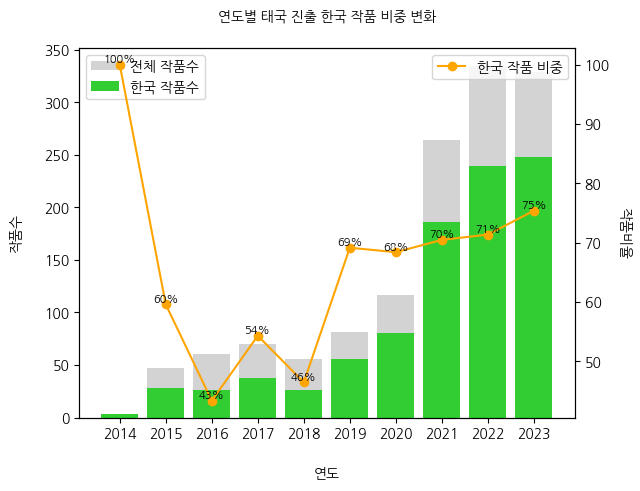

In [ ]:
fig, ax1 = plt.subplots()

p1 = ax1.bar(year_cnt['연도'], year_cnt['빈도'], color='darkgray', alpha=0.5, label = '전체 작품수')
p2 = ax1.bar(kor_year_cnt['연도'], kor_year_cnt['빈도'], color='limegreen', label = '한국 작품수')

ax2 = ax1.twinx()
ratio = (kor_year_cnt['빈도'] / year_cnt['빈도']) * 100
ax2.plot(kor_year_cnt['연도'], ratio, color='orange', linestyle='solid', marker='o', label='한국 작품 비중') ## 선 그래프 출력

plt.title('연도별 태국 진출 한국 작품 비중 변화', fontsize=10, pad=20)
ax1.set_xlabel('연도', fontsize=10, labelpad=20)
ax1.set_ylabel('작품수', fontsize=10, labelpad=15)
ax2.set_ylabel('작품비율', fontsize=10, labelpad=15, rotation=270)
plt.xticks(year_cnt['연도'], fontsize=10, rotation=45)

for i, v in enumerate(ratio):
    plt.text(year_cnt['연도'][i], v, '%.0f' % v + '%', ha='center', va='bottom', size=8)

# for rect1, rect2 in zip(p1, p2):
#     height1 = rect1.get_height()
#     height2 = rect2.get_height()
#     plt.text(rect1.get_x() + rect1.get_width()/2.0, height1, '%.0f' % height1, ha='center', va='bottom', size=8)
#     plt.text(rect2.get_x() + rect2.get_width()/2.0, height2, '%.0f' % height2, ha='center', va='bottom', size=8)

ax1.legend(['전체 작품수', '한국 작품수'], loc='upper left')
ax2.legend(['한국 작품 비중'], loc='upper right')

### **3. 연도별 태국 진출 한국 작품 비중 변화 (네이버웹툰 vs. 네이버시리즈)**

In [ ]:
webtoon_year_cnt = webtoon_year_cnt.sort_values('연도')
webtoon_year_cnt.reset_index(drop=True, inplace=True)
webtoon_year_cnt

,연도,빈도
0,2014,3
1,2015,28
2,2016,26
3,2017,38
4,2018,26
5,2019,45
6,2020,71
7,2021,145
8,2022,176
9,2023,196


In [ ]:
series_year_cnt.loc[5] = [2014, 0]
series_year_cnt.loc[6] = [2015, 0]
series_year_cnt.loc[7] = [2016, 0]
series_year_cnt.loc[8] = [2017, 0]
series_year_cnt.loc[9] = [2018, 0]

series_year_cnt = series_year_cnt.sort_values('연도')
series_year_cnt.reset_index(drop=True, inplace=True)
series_year_cnt

,연도,빈도
0,2014,0
1,2015,0
2,2016,0
3,2017,0
4,2018,0
5,2019,11
6,2020,9
7,2021,41
8,2022,63
9,2023,52


In [ ]:
webtoon_series_year_cnt = webtoon_year_cnt.merge(series_year_cnt, on='연도', how='outer')
webtoon_series_year_cnt.rename(columns={'빈도_x':'빈도(웹툰)', '빈도_y':'빈도(시리즈)'}, inplace=True)
webtoon_series_year_cnt

,연도,빈도(웹툰),빈도(시리즈)
0,2014,3,0
1,2015,28,0
2,2016,26,0
3,2017,38,0
4,2018,26,0
5,2019,45,11
6,2020,71,9
7,2021,145,41
8,2022,176,63
9,2023,196,52


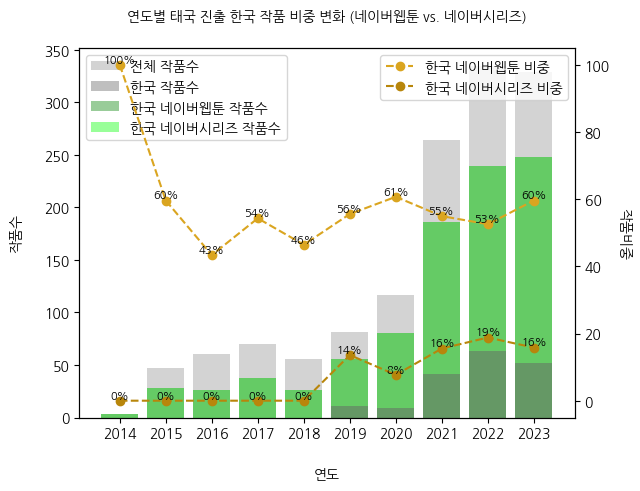

In [ ]:
fig, ax1 = plt.subplots()

p1 = ax1.bar(year_cnt['연도'], year_cnt['빈도'], color='darkgray', alpha=0.5, label = '전체 작품수')
p2 = ax1.bar(kor_year_cnt['연도'], kor_year_cnt['빈도'], color='gray', alpha=0.5, label = '한국 작품수')
p4 = ax1.bar(webtoon_series_year_cnt['연도'], webtoon_series_year_cnt['빈도(시리즈)'], color='green', alpha=0.4, label = '한국 네이버시리즈 작품수')
p3 = ax1.bar(webtoon_series_year_cnt['연도'], webtoon_series_year_cnt['빈도(웹툰)'], color='lime', alpha=0.4, label = '한국 네이버웹툰 작품수', bottom=webtoon_series_year_cnt['빈도(시리즈)'])
             
# ratio = (kor_year_cnt['빈도'] / year_cnt['빈도']) * 100
ratio1 = (webtoon_series_year_cnt['빈도(웹툰)'] / year_cnt['빈도']) * 100
ratio2 = (webtoon_series_year_cnt['빈도(시리즈)'] / year_cnt['빈도']) * 100

ax2 = ax1.twinx()

# ax2.plot(kor_year_cnt['연도'], ratio, color='orange', linestyle='solid', marker='o', label='한국 작품 비중')
ax2.plot(webtoon_series_year_cnt['연도'], ratio1, color='goldenrod', linestyle='--', marker='o', label='네이버웹툰 작품 비중') ## 선 그래프 출력
ax2.plot(webtoon_series_year_cnt['연도'], ratio2, color='darkgoldenrod', linestyle='--', marker='o', label='네이버웹툰 작품 비중') ## 선 그래프 출력

plt.title('연도별 태국 진출 한국 작품 비중 변화 (네이버웹툰 vs. 네이버시리즈)', fontsize=10, pad=20)
ax1.set_xlabel('연도', fontsize=10, labelpad=20)
ax1.set_ylabel('작품수', fontsize=10, labelpad=15)
ax2.set_ylabel('작품비중', fontsize=10, labelpad=15, rotation=270)
plt.xticks(year_cnt['연도'], fontsize=10, rotation=45)

# for i, v in enumerate(ratio):
#     plt.text(year_cnt['연도'][i], v, '%.0f' % v + '%', ha='center', va='bottom', size=8)

for i, v in enumerate(ratio1):
    plt.text(year_cnt['연도'][i], v, '%.0f' % v + '%', ha='center', va='bottom', size=8)

for i, v in enumerate(ratio2):
    plt.text(year_cnt['연도'][i], v, '%.0f' % v + '%', ha='center', va='bottom', size=8)

# for rect1, rect2 in zip(p3, p4):
#     height1 = rect1.get_height()
#     height2 = rect2.get_height()
#     ax1.text(rect1.get_x() + rect1.get_width()/2.0, height1, '%.0f' % height1, ha='center', va='bottom', size=8)
#     ax1.text(rect2.get_x() + rect2.get_width()/2.0, height2, '%.0f' % height2, ha='center', va='bottom', size=8)

ax1.legend(['전체 작품수', '한국 작품수', '한국 네이버웹툰 작품수', '한국 네이버시리즈 작품수'], loc='upper left')
ax2.legend(['한국 네이버웹툰 비중', '한국 네이버시리즈 비중'], loc='upper right')

In [ ]:
df_copy.columns

Index(['제목', '작가', '장르(태국)', '좋아요수', '조회수', '구독수', '별점', '회차', '연재시작일(태국)',
       '마지막연재일(태국)', '국가', '한국제목', '한국작가명', '회차(한국)', '별점(한국)', '관심수(한국)',
       '장르(한국)', '해시태그(한국)', '연재시작일(한국)', '마지막연재일(한국)', '완결여부', '웹툰/시리즈구분',
       '작가전작개수', 'OSMU여부', '태국진출여부', '연재시작일(태국)_연도', '마지막연재일(태국)_연도',
       '연재기간(태국)_연도'],
      dtype='object')

### **4. 기타 수치형 데이터 분석**

In [ ]:
# 태국 진출 한국 웹툰 에피소드당 평균 조회수
(df_copy[(df_copy['한국제목'].notna()) & (df_copy['국가']=='한국')]['조회수'] / df_copy[(df_copy['한국제목'].notna()) & (df_copy['국가']=='한국')]['회차']).mean()

1480689.579652097

In [ ]:
# 태국 진출 한국 웹툰 작품당 평균 태국 구독수
df_copy[(df_copy['한국제목'].notna()) & (df_copy['국가']=='한국')]['구독수'].mean()

175151.0

In [ ]:
# 태국 진출 한국 웹툰 작품당 평균 한국 관심수
df_copy[(df_copy['한국제목'].notna()) & (df_copy['국가']=='한국')]['관심수(한국)'].mean()

219977.13682432432

In [ ]:
# 태국 진출 한국 웹툰 작품당 평균 별점
df_copy[(df_copy['한국제목'].notna()) & (df_copy['국가']=='한국')]['별점'].mean()

9.558141891891893

In [ ]:
# 태국 웹툰 작품당 평균 별점
df_copy[(df_copy['국가']=='태국')]['별점'].mean()

9.517486338797815

In [ ]:
# 태국 진출 한국 웹툰 작품당 평균 한국 관심수
df_copy[(df_copy['한국제목'].isna()) | ((df_copy['국가']!='한국') & (df_copy['국가']!='태국'))]['별점'].mean()

9.410491228070176

In [ ]:
# 한국 웹툰 작품당 평균 좋아요수
df_copy[(df_copy['국가']=='한국')]['좋아요수'].mean()

420699.3476874003

In [ ]:
# 태국 웹툰 작품당 평균 별점
df_copy[(df_copy['국가']=='태국')]['좋아요수'].mean()

510721.39344262297

In [ ]:
# 태국 진출 한국 웹툰 작품당 평균 한국 관심수
df_copy[(df_copy['한국제목'].isna()) | ((df_copy['국가']!='한국') & (df_copy['국가']!='태국'))]['좋아요수'].mean()

438862.6947368421

### **5. 장르별 작품수 및 작품비중**

In [ ]:
product_count = df_copy.groupby(['장르(태국)'])['장르(태국)'].size().reset_index(name='count').sort_values(by=['count'], ascending=False)
product_count.reset_index(drop=True, inplace=True)
product_count

,장르(태국),count
0,로맨스,222
1,로맨스판타지,130
2,드라마,105
3,액션,101
4,판타지,86
5,스릴러,58
6,LGBTQ+ / Y,55
7,개그,40
8,소설,27
9,감성,21


In [ ]:
kor_product_count = df_copy[df_copy['한국제목'].notna()].groupby(['장르(태국)'])['장르(태국)'].size().reset_index(name='count').sort_values(by=['count'], ascending=False)
kor_product_count.reset_index(drop=True, inplace=True)
kor_product_count

,장르(태국),count
0,로맨스,150
1,로맨스판타지,104
2,액션,84
3,드라마,71
4,판타지,67
5,스릴러,41
6,LGBTQ+ / Y,30
7,개그,20
8,공포,9
9,감성,7


/var/folders/lf/rw90dn5523z_2nzwhfsv6yn40000gn/T/ipykernel_95521/62964099.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_count['장르(태국)'], fontsize=10, rotation=45)


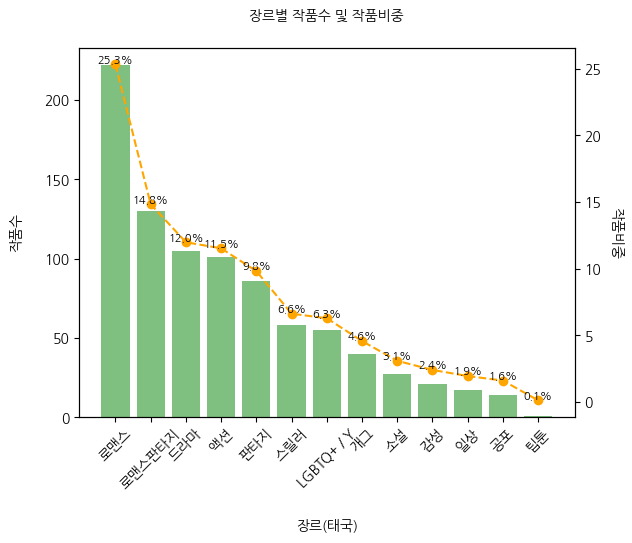

In [ ]:
fig, ax1 = plt.subplots()

p1 = ax1.bar(product_count['장르(태국)'], product_count['count'], color='green', alpha=0.5)
# p2 = ax1.bar(kor_product_count['장르(태국)'], kor_product_count['count'], color='lime', alpha=0.5)

ax2 = ax1.twinx()

ratio = (product_count['count'] / product_count['count'].sum()) * 100
ax2.plot(product_count['장르(태국)'], ratio, color='orange', linestyle='--', marker='o', label='장르별 작품 비중') ## 선 그래프 출력

plt.title('장르별 작품수 및 작품비중', fontsize=10, pad=20)
ax1.set_xlabel('장르(태국)', fontsize=10, labelpad=20)
ax1.set_ylabel('작품수', fontsize=10, labelpad=15)
ax2.set_ylabel('작품비중', fontsize=10, labelpad=15, rotation=270)
ax1.set_xticklabels(product_count['장르(태국)'], fontsize=10, rotation=45)

for i, v in enumerate(ratio):
    ax2.text(i, v, '%.1f' %v + '%', ha='center', va='bottom', size=8)

# for rect1, rect2 in zip(p1, p2):
#     height1 = rect1.get_height()
#     height2 = rect2.get_height()
#     plt.text(rect1.get_x() + rect1.get_width()/2.0, height1, '%.0f' % height1, ha='center', va='bottom', size=8)
#     plt.text(rect2.get_x() + rect2.get_width()/2.0, height2, '%.0f' % height2, ha='center', va='bottom', size=8)

# ax1.legend(['전체 작품수', '한국 작품수', '한국 네이버웹툰 작품수', '한국 네이버시리즈 작품수'], loc='upper left')
# ax2.legend(['한국 네이버웹툰 비중', '한국 네이버시리즈 비중'], loc='upper right')

plt.show()

### **6. 장르별 한국 작품수 및 작품비중**

/var/folders/lf/rw90dn5523z_2nzwhfsv6yn40000gn/T/ipykernel_95521/1874100491.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_count['장르(태국)'], fontsize=10, rotation=45)


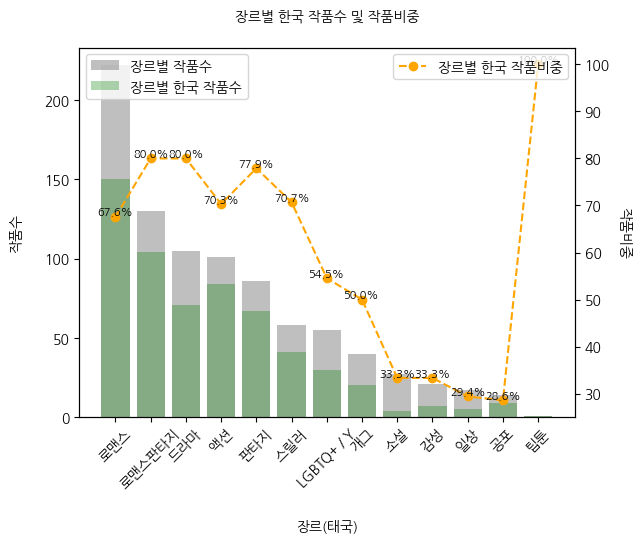

In [ ]:
fig, ax1 = plt.subplots()

p1 = ax1.bar(product_count['장르(태국)'], product_count['count'], color='gray', alpha=0.5)
p2 = ax1.bar(kor_product_count['장르(태국)'], kor_product_count['count'], color='green', alpha=0.3)

ax2 = ax1.twinx()

ratio = (kor_product_count['count'] / product_count['count']) * 100
ax2.plot(product_count['장르(태국)'], ratio, color='orange', linestyle='--', marker='o', label='장르별 작품 비중') ## 선 그래프 출력

plt.title('장르별 한국 작품수 및 작품비중', fontsize=10, pad=20)
ax1.set_xlabel('장르(태국)', fontsize=10, labelpad=20)
ax1.set_ylabel('작품수', fontsize=10, labelpad=15)
ax2.set_ylabel('작품비중', fontsize=10, labelpad=15, rotation=270)
ax1.set_xticklabels(product_count['장르(태국)'], fontsize=10, rotation=45)

for i, v in enumerate(ratio):
    ax2.text(i, v, '%.1f' %v + '%', ha='center', va='bottom', size=8)

# for rect1, rect2 in zip(p1, p2):
#     height1 = rect1.get_height()
#     height2 = rect2.get_height()
#     plt.text(rect1.get_x() + rect1.get_width()/2.0, height1, '%.0f' % height1, ha='center', va='bottom', size=8)
#     plt.text(rect2.get_x() + rect2.get_width()/2.0, height2, '%.0f' % height2, ha='center', va='bottom', size=8)

ax1.legend(['장르별 작품수', '장르별 한국 작품수'], loc='upper left')
ax2.legend(['장르별 한국 작품비중'], loc='upper right')

plt.show()

### **7. 한국 장르별 작품수 및 작품비중**

In [ ]:
product_count = df_copy.groupby(['장르(한국)'])['장르(한국)'].size().reset_index(name='count').sort_values(by=['count'], ascending=False)
product_count.reset_index(drop=True, inplace=True)
product_count

,장르(한국),count
0,로맨스,179
1,드라마,79
2,판타지,71
3,액션,69
4,순정,52
5,스릴러,49
6,로판,27
7,BL,26
8,개그,10
9,소년,9


In [ ]:
kor_product_count = df_copy[df_copy['한국제목'].notna()].groupby(['장르(태국)'])['장르(태국)'].size().reset_index(name='count').sort_values(by=['count'], ascending=False)
kor_product_count.reset_index(drop=True, inplace=True)
kor_product_count

,장르(태국),count
0,로맨스,150
1,로맨스판타지,104
2,액션,84
3,드라마,71
4,판타지,67
5,스릴러,41
6,LGBTQ+ / Y,30
7,개그,20
8,공포,9
9,감성,7


/var/folders/lf/rw90dn5523z_2nzwhfsv6yn40000gn/T/ipykernel_95521/2553712992.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_count['장르(한국)'], fontsize=10, rotation=45)


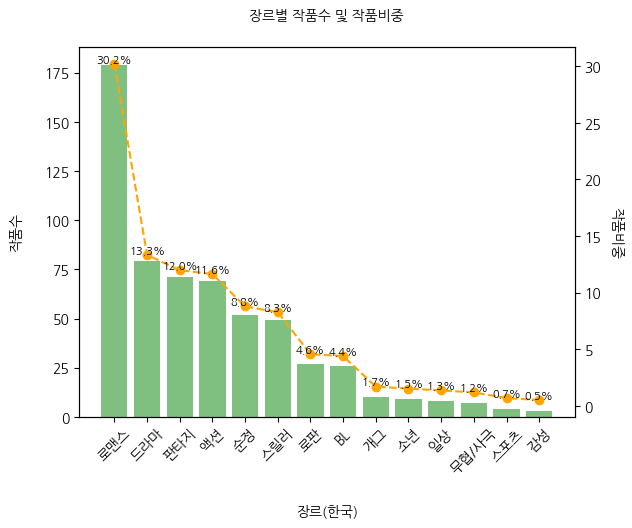

In [ ]:
fig, ax1 = plt.subplots()

p1 = ax1.bar(product_count['장르(한국)'], product_count['count'], color='green', alpha=0.5)
# p2 = ax1.bar(kor_product_count['장르(한국)'], kor_product_count['count'], color='lime', alpha=0.5)

ax2 = ax1.twinx()

ratio = (product_count['count'] / product_count['count'].sum()) * 100
ax2.plot(product_count['장르(한국)'], ratio, color='orange', linestyle='--', marker='o', label='장르별 작품 비중') ## 선 그래프 출력

plt.title('장르별 작품수 및 작품비중', fontsize=10, pad=20)
ax1.set_xlabel('장르(한국)', fontsize=10, labelpad=20)
ax1.set_ylabel('작품수', fontsize=10, labelpad=15)
ax2.set_ylabel('작품비중', fontsize=10, labelpad=15, rotation=270)
ax1.set_xticklabels(product_count['장르(한국)'], fontsize=10, rotation=45)

for i, v in enumerate(ratio):
    ax2.text(i, v, '%.1f' %v + '%', ha='center', va='bottom', size=8)

# for rect1, rect2 in zip(p1, p2):
#     height1 = rect1.get_height()
#     height2 = rect2.get_height()
#     plt.text(rect1.get_x() + rect1.get_width()/2.0, height1, '%.0f' % height1, ha='center', va='bottom', size=8)
#     plt.text(rect2.get_x() + rect2.get_width()/2.0, height2, '%.0f' % height2, ha='center', va='bottom', size=8)

# ax1.legend(['전체 작품수', '한국 작품수', '한국 네이버웹툰 작품수', '한국 네이버시리즈 작품수'], loc='upper left')
# ax2.legend(['한국 네이버웹툰 비중', '한국 네이버시리즈 비중'], loc='upper right')

plt.show()

### **8. 연도별 장르별 작품수 및 증가추세**

In [ ]:
action = df_copy[(df_copy['장르(태국)'] == '액션')]
romancefantasy = df_copy[(df_copy['장르(태국)'] == '로맨스판타지')]
drama = df_copy[(df_copy['장르(태국)'] == '드라마')]
lgbtq = df_copy[(df_copy['장르(태국)'] == 'LGBTQ+ / Y')]
romance = df_copy[(df_copy['장르(태국)'] == '로맨스')]
fantasy = df_copy[(df_copy['장르(태국)'] == '판타지')]
daily = df_copy[(df_copy['장르(태국)'] == '일상')]
horror = df_copy[(df_copy['장르(태국)'] == '공포')]
thriller = df_copy[(df_copy['장르(태국)'] == '스릴러')]
fun = df_copy[(df_copy['장르(태국)'] == '개그')]
novel = df_copy[(df_copy['장르(태국)'] == '소설')]
emotion = df_copy[(df_copy['장르(태국)'] == '감성')]
tiptoon = df_copy[(df_copy['장르(태국)'] == '팁툰')]

In [ ]:
action_cnt = [year for years in action['연재기간(태국)_연도'] for year in years]
action_cnt = pd.DataFrame(list(Counter(action_cnt).items()), columns=['연도', '빈도'])

romancefantasy_cnt = [year for years in romancefantasy['연재기간(태국)_연도'] for year in years]
romancefantasy_cnt = pd.DataFrame(list(Counter(romancefantasy_cnt).items()), columns=['연도', '빈도'])

drama_cnt = [year for years in drama['연재기간(태국)_연도'] for year in years]
drama_cnt = pd.DataFrame(list(Counter(drama_cnt).items()), columns=['연도', '빈도'])

lgbtq_cnt = [year for years in lgbtq['연재기간(태국)_연도'] for year in years]
lgbtq_cnt = pd.DataFrame(list(Counter(lgbtq_cnt).items()), columns=['연도', '빈도'])

romance_cnt = [year for years in romance['연재기간(태국)_연도'] for year in years]
romance_cnt = pd.DataFrame(list(Counter(romance_cnt).items()), columns=['연도', '빈도'])

fantasy_cnt = [year for years in fantasy['연재기간(태국)_연도'] for year in years]
fantasy_cnt = pd.DataFrame(list(Counter(fantasy_cnt).items()), columns=['연도', '빈도'])

daily_cnt = [year for years in daily['연재기간(태국)_연도'] for year in years]
daily_cnt = pd.DataFrame(list(Counter(daily_cnt).items()), columns=['연도', '빈도'])

horror_cnt = [year for years in horror['연재기간(태국)_연도'] for year in years]
horror_cnt = pd.DataFrame(list(Counter(horror_cnt).items()), columns=['연도', '빈도'])

thriller_cnt = [year for years in thriller['연재기간(태국)_연도'] for year in years]
thriller_cnt = pd.DataFrame(list(Counter(thriller_cnt).items()), columns=['연도', '빈도'])

fun_cnt = [year for years in fun['연재기간(태국)_연도'] for year in years]
fun_cnt = pd.DataFrame(list(Counter(fun_cnt).items()), columns=['연도', '빈도'])

novel_cnt = [year for years in novel['연재기간(태국)_연도'] for year in years]
novel_cnt = pd.DataFrame(list(Counter(novel_cnt).items()), columns=['연도', '빈도'])

emotion_cnt = [year for years in emotion['연재기간(태국)_연도'] for year in years]
emotion_cnt = pd.DataFrame(list(Counter(emotion_cnt).items()), columns=['연도', '빈도'])

tiptoon_cnt = [year for years in tiptoon['연재기간(태국)_연도'] for year in years]
tiptoon_cnt = pd.DataFrame(list(Counter(tiptoon_cnt).items()), columns=['연도', '빈도'])

In [ ]:
from functools import reduce

dfs = [romance_cnt, romancefantasy_cnt, action_cnt, drama_cnt, lgbtq_cnt, fantasy_cnt, daily_cnt, horror_cnt, thriller_cnt, fun_cnt, novel_cnt, emotion_cnt, tiptoon_cnt]
dfs_name = ['로맨스', '로맨스판타지', '액션', '드라마', 'lgbtq', '판타지', '일상', '공포', '스릴러', '개그', '소설', '감성', '팁툰']

merged_df = dfs[0]

for df, name in zip(dfs[1:], dfs_name[1:]):
    merged_df = merged_df.merge(df, on='연도', how='outer', suffixes=('', f'_{name}'))

merged_df.sort_values('연도', inplace=True)
merged_df.reset_index(drop=True, inplace=True)

In [ ]:
# 연도를 인덱스로 설정
merged_df.rename(columns={'빈도': '빈도_로맨스'}, inplace=True)
merged_df.columns = merged_df.columns.str.replace('빈도_', '')
merged_df.set_index('연도', inplace=True)
merged_df.fillna(0, inplace=True)

merged_df

,로맨스,로맨스판타지,액션,드라마,lgbtq,판타지,일상,공포,스릴러,개그,소설,감성,팁툰
연도,,,,,,,,,,,,,
2014,0.00000,0.00000,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,0.00000,1.00000,0.00000
2015,5.00000,0.00000,3,4.00000,0.00000,10.00000,3.00000,1.00000,2.00000,10,0.00000,9.00000,0.00000
2016,10.00000,0.00000,4,7.00000,0.00000,9.00000,5.00000,1.00000,6.00000,12,1.00000,5.00000,0.00000
2017,11.00000,0.00000,6,13.00000,0.00000,6.00000,8.00000,0.00000,10.00000,10,1.00000,5.00000,0.00000
2018,10.00000,1.00000,3,11.00000,1.00000,5.00000,6.00000,2.00000,7.00000,7,0.00000,3.00000,0.00000
2019,19.00000,7.00000,8,15.00000,5.00000,8.00000,4.00000,1.00000,6.00000,3,2.00000,3.00000,0.00000
2020,33.00000,13.00000,14,18.00000,5.00000,7.00000,4.00000,3.00000,7.00000,10,3.00000,0.00000,0.00000
2021,69.00000,44.00000,32,28.00000,15.00000,32.00000,5.00000,6.00000,8.00000,11,10.00000,3.00000,1.00000
2022,76.00000,66.00000,50,34.00000,25.00000,40.00000,7.00000,3.00000,15.00000,5,11.00000,3.00000,0.00000


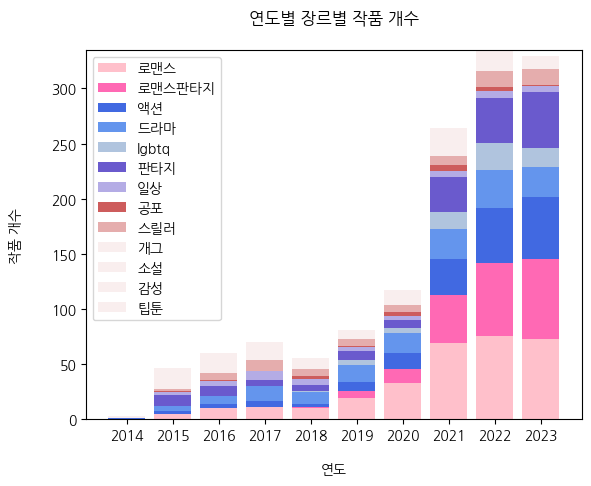

In [ ]:
plt.bar(merged_df.index, merged_df['로맨스'], color='pink', label='로맨스판타지')
plt.bar(merged_df.index, merged_df['로맨스판타지'],  bottom=merged_df['로맨스'], color='hotpink', label='로맨스판타지')
plt.bar(merged_df.index, merged_df['액션'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'], color='royalblue', label='액션')
plt.bar(merged_df.index, merged_df['드라마'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'], color='cornflowerblue', label='드라마')
plt.bar(merged_df.index, merged_df['lgbtq'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마'], color='lightsteelblue', label='드라마')
plt.bar(merged_df.index, merged_df['판타지'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'], color='slateblue', label='드라마')
plt.bar(merged_df.index, merged_df['일상'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'], color='slateblue', label='드라마', alpha=0.5)
plt.bar(merged_df.index, merged_df['공포'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'] + merged_df['일상'], color='indianred', label='드라마')
plt.bar(merged_df.index, merged_df['스릴러'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'] + merged_df['일상'] + merged_df['공포'], color='indianred', label='드라마', alpha=0.5)
plt.bar(merged_df.index, merged_df['개그'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'] + merged_df['일상'] + merged_df['공포'] + merged_df['스릴러'], color='indianred', alpha=0.1, label='드라마')
plt.bar(merged_df.index, merged_df['소설'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'] + merged_df['일상'] + merged_df['공포'] + merged_df['스릴러'] + merged_df['개그'], color='indianred', alpha=0.1, label='드라마')
plt.bar(merged_df.index, merged_df['감성'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'] + merged_df['일상'] + merged_df['공포'] + merged_df['스릴러'] + merged_df['개그'] + merged_df['소설'], color='indianred', alpha=0.1, label='드라마')
plt.bar(merged_df.index, merged_df['팁툰'], bottom=merged_df['로맨스'] + merged_df['로맨스판타지'] + merged_df['액션'] + merged_df['드라마']  + merged_df['lgbtq'] + merged_df['판타지'] + merged_df['일상'] + merged_df['공포'] + merged_df['스릴러'] + merged_df['개그'] + merged_df['소설'] + merged_df['감성'], color='indianred', alpha=0.1, label='드라마')

plt.title('연도별 장르별 작품 개수', pad=20)
plt.xlabel('연도', labelpad=15)
plt.ylabel('작품 개수', labelpad=20)
plt.xticks(merged_df.index, fontsize=10)
plt.legend(['로맨스', '로맨스판타지', '액션', '드라마', 'lgbtq', '판타지', '일상', '공포', '스릴러', '개그', '소설', '감성', '팁툰'])

### **9. 장르별 인기도**

In [ ]:
genre_stats = df_copy.groupby(['장르(태국)'])[['좋아요수', '조회수', '구독수', '별점']].mean().sort_values(by=['구독수'], ascending=False)
genre_stats

,좋아요수,조회수,구독수,별점
장르(태국),,,,
감성,760222.90476,28589902.23810,309418.38095,9.62238
개그,517504.97500,20595000.00000,230432.85000,9.53925
일상,961388.82353,29641176.47059,228960.70588,9.52000
로맨스,444237.24775,14263536.00901,194872.93243,9.52428
로맨스판타지,452014.46154,11416514.95385,193552.39231,9.44915
드라마,465671.10476,13738706.04762,177410.93333,9.46057
판타지,448158.12791,16287344.77907,172184.45349,9.56186
액션,476637.84158,19197608.47525,165376.78218,9.46089
공포,489523.64286,20557142.85714,165190.35714,9.67357


In [ ]:
# 장르별 인기도 분석
genre_stats = df_copy[df_copy['한국제목'].notna()].groupby(['장르(태국)'])[['좋아요수', '조회수', '구독수']].mean().sort_values(by=['구독수'], ascending=False)
genre_stats = genre_stats[:5]
genre_stats

,좋아요수,조회수,구독수
장르(태국),,,
로맨스판타지,481915.67308,12070471.98077,202366.50000
판타지,504631.40299,18620755.80597,192927.92537
액션,540706.46429,21663719.58333,183686.85714
로맨스,399619.88000,12597552.12667,181719.18667
드라마,489041.18310,14009012.69014,167380.36620


In [ ]:
genres = ['로맨스판타지', '판타지', '액션', '로맨스', '드라마']
check = ['좋아요수', '조회수', '구독수']

romancefantasy = [481915.67308,	12070471.98077,	202366.50000]
fantasy = [504631.40299,	18620755.80597,	192927.92537]
action = [540706.46429,	21663719.58333,	183686.85714]
romance = [399619.88000,	12597552.12667,	181719.18667]
drama = [489041.18310,	14009012.69014,	167380.36620]

genre_df = pd.DataFrame({'로맨스판타지':romancefantasy, '판타지':fantasy, '액션':action, '로맨스':romance, '드라마':drama}, index=check)
genre_df

,로맨스판타지,판타지,액션,로맨스,드라마
좋아요수,481915.67308,504631.40299,540706.46429,399619.88000,489041.18310
조회수,12070471.98077,18620755.80597,21663719.58333,12597552.12667,14009012.69014
구독수,202366.50000,192927.92537,183686.85714,181719.18667,167380.36620


In [ ]:
thai_top = df_copy[df_copy['한국제목'].notna()].sort_values(by=['구독수', '좋아요수', '조회수', '별점'], ascending=False)
kor_top = df_copy[df_copy['한국제목'].notna()].sort_values(by=['관심수(한국)', '별점(한국)'], ascending=False)

In [ ]:
thai_top[['한국제목', '장르(태국)', '장르(한국)', '구독수', '좋아요수', '조회수', '별점', '작가전작개수', 'OSMU여부']].head(20)

,한국제목,장르(태국),장르(한국),구독수,좋아요수,조회수,별점,작가전작개수,OSMU여부
203,외모지상주의,액션,드라마,2400000,11700000,556500000,9.78000,6,False
417,여신강림,로맨스,로맨스,2400000,7000000,312700000,9.70000,2,True
369,HD어느 날 공주가 되어버렸다,로맨스판타지,순정,1200000,4500000,144100000,9.87000,3,False
473,체인지,드라마,액션,1100000,5000000,174000000,9.77000,1,False
462,[드라마원작] 내 ID는 강남미인!,로맨스,로맨스,1000000,2300000,94900000,9.85000,5,True
252,재혼 황후,로맨스판타지,로맨스,919186,3900000,106400000,9.88000,3,False
600,언터처블,로맨스,로맨스,846526,1400000,91600000,9.79000,3,False
308,스터디그룹,액션,액션,811299,2900000,87300000,9.88000,5,False
765,오렌지 마말레이드,로맨스,로맨스,764280,1300000,82000000,9.73000,6,True
644,갓 오브 하이스쿨,액션,판타지,758060,3300000,227100000,9.71000,2,False


In [ ]:
kor_top[['한국제목', '장르(태국)', '장르(한국)', '관심수(한국)', '별점(한국)', '작가전작개수', 'OSMU여부']].head(20)

,한국제목,장르(태국),장르(한국),관심수(한국),별점(한국),작가전작개수,OSMU여부
636,연애혁명,드라마,드라마,2542741,9.94000,1,False
203,외모지상주의,액션,드라마,2362169,9.75000,6,False
171,신의 탑,판타지,판타지,1963389,9.82000,1,False
573,마음의소리,일상,개그,1734698,9.83000,19,True
476,노블레스,판타지,판타지,1353873,8.03000,5,False
774,노블레스,판타지,판타지,1353873,8.03000,5,False
644,갓 오브 하이스쿨,액션,판타지,1340503,9.89000,2,False
589,[드라마원작] 유미의 세포들,일상,로맨스,1309671,9.96000,13,True
417,여신강림,로맨스,로맨스,1245072,8.40000,2,True
239,화산귀환,판타지,무협/사극,1157195,9.94000,13,False
